In [1]:
#Importing libraries:
import pandas as pd
#Pandas is mainly used for data analysis. Pandas allows importing data from various file formats such as comma-separated values, JSON, SQL database tables or queries, and Microsoft Excel.
import numpy as np
#numpy is a library which is used to work with arrays
#NLTK is a toolkit build for working with NLP in Python
import nltk





In [2]:
#Downloading the collections -popular
import nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [3]:
#Read the data into text data in the form of dataframes.
textdata = pd.read_csv('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv')

In [4]:
#Read the top 5 elements in the dataframe

textdata.head(5)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [5]:
#Dropping unwanted columns
textdata.drop('id', axis=1, inplace=True)
textdata.head()



,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [6]:
#importing regex to remove the punctuations in the data
import re
list_words=[]
#converting the data in column into a list
list_tweet = textdata['tweet'].values.tolist()
for i in range(len(list_tweet)):
    list_words.append(re.sub(re.compile(r'[^a-zA-Z\s]'),"",list_tweet[i]).lower().strip())

print(list_words)
print(len(list_words))


['user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction   run', 'user user thanks for lyft credit i cant use cause they dont offer wheelchair vans in pdx    disapointed getthanked', 'bihday your majesty', 'model   i love u take with u all the time in ur', 'factsguide society now    motivation', 'huge fan fare and big talking before they leave chaos and pay disputes when they get there allshowandnogo', 'user camping tomorrow user user user user user user user danny', 'the next school year is the year for exams cant think about that  school exams   hate imagine actorslife revolutionschool girl', 'we won love the land allin cavs champions cleveland clevelandcavaliers', 'user user welcome here   im   its so gr', 'ireland consumer price index mom climbed from previous  to  in may   blog silver gold forex', 'we are so selfish orlando standwithorlando pulseshooting orlandoshooting biggerproblems selfish heabreaking   values love', 'i get to see my daddy 

In [7]:
#Adding a new column in the text data dataframe
textdata['tweet_nopunc']=list_words
textdata.head()

,label,tweet,tweet_nopunc
0,0,@user when a father is dysfunctional and is s...,user when a father is dysfunctional and is so ...
1,0,@user @user thanks for #lyft credit i can't us...,user user thanks for lyft credit i cant use ca...
2,0,bihday your majesty,bihday your majesty
3,0,#model i love u take with u all the time in ...,model i love u take with u all the time in ur
4,0,factsguide: society now #motivation,factsguide society now motivation


In [8]:
#importing stopwords module and appending one more stopword
from nltk.corpus import stopwords
stopwords_final = stopwords.words('english')

stopwords_final.append('user')

#removing thge stop words from the column and adding a new column (tweet_nosw) in the dataframe
textdata['tweet_nosw'] = textdata['tweet_nopunc'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords_final)]))
textdata.head()

,label,tweet,tweet_nopunc,tweet_nosw
0,0,@user when a father is dysfunctional and is s...,user when a father is dysfunctional and is so ...,father dysfunctional selfish drags kids dysfun...
1,0,@user @user thanks for #lyft credit i can't us...,user user thanks for lyft credit i cant use ca...,thanks lyft credit cant use cause dont offer w...
2,0,bihday your majesty,bihday your majesty,bihday majesty
3,0,#model i love u take with u all the time in ...,model i love u take with u all the time in ur,model love u take u time ur
4,0,factsguide: society now #motivation,factsguide society now motivation,factsguide society motivation


In [9]:
#Checking for null values
textdata_1=textdata.dropna(axis=0, how="any", thresh=None, subset=None, inplace=False)
print(textdata_1.shape)
print(textdata.shape)


(31962, 4)
(31962, 4)


In [10]:
#Stemming the words
from nltk.stem import PorterStemmer

porter = PorterStemmer()

stem_words_1=[]
for w in textdata['tweet_nosw']:
    stem_words_1.append(porter.stem(w))

stem_words_1[:10]

['father dysfunctional selfish drags kids dysfunction run',
 'thanks lyft credit cant use cause dont offer wheelchair vans pdx disapointed getthank',
 'bihday majesti',
 'model love u take u time ur',
 'factsguide society motiv',
 'huge fan fare big talking leave chaos pay disputes get allshowandnogo',
 'camping tomorrow danni',
 'next school year year exams cant think school exams hate imagine actorslife revolutionschool girl',
 'love land allin cavs champions cleveland clevelandcavali',
 'welcome im gr']

In [11]:
#importing required modules
from nltk.corpus.reader import lin

from nltk import WordNetLemmatizer

lemma = WordNetLemmatizer()

#creating a new array to store limitized words
limitized_words=[]

for w in textdata['tweet_nosw']:
    limitized_words.append(lemma.lemmatize(w))

limitized_words[:10]

['father dysfunctional selfish drags kids dysfunction run',
 'thanks lyft credit cant use cause dont offer wheelchair vans pdx disapointed getthanked',
 'bihday majesty',
 'model love u take u time ur',
 'factsguide society motivation',
 'huge fan fare big talking leave chaos pay disputes get allshowandnogo',
 'camping tomorrow danny',
 'next school year year exams cant think school exams hate imagine actorslife revolutionschool girl',
 'love land allin cavs champions cleveland clevelandcavaliers',
 'welcome im gr']

In [12]:
#Pos tagging on lemetized words
result=' '.join(limitized_words[:10]).split()
for words in result:
    tagged_words = nltk.pos_tag(result)
    
tagged_words[:10]

[('father', 'RBR'),
 ('dysfunctional', 'JJ'),
 ('selfish', 'JJ'),
 ('drags', 'NNS'),
 ('kids', 'NNS'),
 ('dysfunction', 'NN'),
 ('run', 'VBP'),
 ('thanks', 'NNS'),
 ('lyft', 'VBP'),
 ('credit', 'NN')]

{'father': 13319, 'dysfunctional': 11694, 'selfish': 32359, 'drags': 11377, 'kids': 20473, 'dysfunction': 11693, 'run': 31492, 'thanks': 36239, 'lyft': 22514, 'credit': 9311, 'use': 38411, 'cause': 7201, 'offer': 26445, 'wheelchair': 39770, 'vans': 38564, 'pdx': 27637, 'disapointed': 10796, 'getthanked': 15324, 'bihday': 5052, 'majesty': 22721, 'model': 24086, 'love': 22169, 'u': 37921, 'take': 35671, 'time': 36824, 'ur': 38370, 'factsguide': 13080, 'society': 33742, 'motivation': 24390, '2': 430, 'huge': 17898, 'fan': 13197, 'fare': 13230, 'big': 4991, 'talking': 35710, 'leave': 21229, 'chaos': 7460, 'pay': 27580, 'disputes': 10914, 'get': 15292, 'allshowandnogo': 2372, 'camping': 6810, 'tomorrow': 37050, 'dannya': 9871, 'next': 25524, 'school': 32033, 'year': 40749, 'exams': 12772, 'think': 36592, 'hate': 16860, 'imagine': 18448, 'actorslife': 1676, 'revolutionschool': 30909, 'girl': 15444, 'land': 20960, 'allin': 2340, 'cavs': 7214, 'champions': 7420, 'cleveland': 8083, 'clevelandca

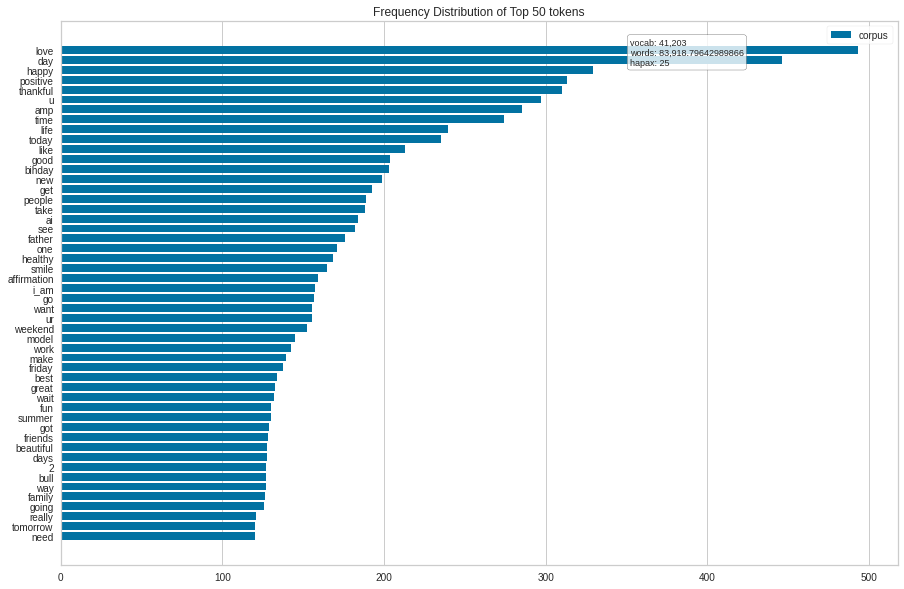

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from yellowbrick.text import FreqDistVisualizer


#TFIDF Vectorization
tfidf_vectorizer = TfidfVectorizer(lowercase = True, tokenizer=None, analyzer='word',strip_accents='ascii',stop_words=stopwords_final,token_pattern='\w+',sublinear_tf=True)
words_bunch_tdidf = tfidf_vectorizer.fit_transform(np.array(textdata.tweet))


#Total words with their index in model :
print(tfidf_vectorizer.vocabulary_)
print("\n")


#Features :
key_features_tdidf=tfidf_vectorizer.get_feature_names_out()


# Displaying the content in a bar chart
hist_visualizer = FreqDistVisualizer(features=key_features_tdidf, orient='h')
plt.figure(figsize = (15, 10)) 
hist_visualizer.fit(words_bunch_tdidf)
hist_visualizer.show()


In [14]:
from keras.preprocessing.text import Tokenizer
#tokenizer turns the text data into vector with coefficents of binary
from keras.preprocessing.sequence import pad_sequences
from keras import regularizers
from sklearn.preprocessing import LabelEncoder
# num_words:the maximum number of words to keep, based on word frequency.
tokenizer_obj = Tokenizer(num_words=2000)
#fit_on_texts:Updates internal vocabulary based on a list of texts.
tokenizer_obj.fit_on_texts(limitized_words)
#texts_to_sequences:Transforms each text in texts to a sequence of integers.
sequences = tokenizer_obj.texts_to_sequences(limitized_words)
#this function transforms a list of sequences into a 2D Numpy array of shape.
word_matrix = pad_sequences(sequences, maxlen=150)
print(word_matrix)
print(len(word_matrix))

[[   0    0    0 ...  162  160  356]
 [   0    0    0 ...  516   21 1354]
 [   0    0    0 ...    0    0   16]
 ...
 [   0    0    0 ...   49   27   59]
 [   0    0    0 ... 1431 1432  549]
 [   0    0    0 ...    0   91   84]]
31962


In [15]:
x=word_matrix
#LabelEncoder can be used to normalize labels
encoder=LabelEncoder()
#Transform the  label into normalize them 
y=encoder.fit_transform(textdata.label.values)
print(x.shape)
print(y.shape)

(31962, 150)
(31962,)


In [16]:
from sklearn.model_selection import train_test_split
#Splitting the data into test and train sets using train_test_split method and printing the shapes of each set
x_tr, x_te, y_tr, y_te = train_test_split(x,y, test_size = 0.3, stratify = y)
print(x_tr.shape)
print(x_te.shape)
print(y_tr.shape)
print(y_te.shape)

(22373, 150)
(9589, 150)
(22373,)
(9589,)


In [17]:
from keras import regularizers
from keras.callbacks import ModelCheckpoint
from keras import layers
from keras.models import Sequential
from keras import backend as K

dl_model = Sequential()
#Turns positive integers (indexes) into dense vectors of fixed size.
dl_model.add(layers.Embedding(2000, 20))
#the layer will use a fast cuDNN implementation
dl_model.add(layers.LSTM(15,dropout=0.5))
# output of dense layer = activation(dot(input, kernel) + bias)
#Activation:Softmax scales numbers/logits into probabilities
dl_model.add(layers.Dense(3,activation='softmax'))



#RMSprop uses an adaptive learning rate instead of treating the learning rate as a hyperparameter. 
#Computes the crossentropy loss between the labels and predictions.
dl_model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
checking_point = ModelCheckpoint("best_model1.hdf5", monitor='val_accuracy', verbose=1, mode='auto',save_weights_only=False)



In [18]:

from tensorflow.keras import utils
# Checking the model outputs for each epoch
model_check = dl_model.fit(x_tr, y_tr, epochs=20,validation_data=(x_te, y_te),callbacks=[checking_point])


Epoch 1/20
700/700 [==============================] - ETA: 0s - loss: 0.2453 - accuracy: 0.9309
Epoch 00001: saving model to best_model1.hdf5
700/700 [==============================] - 51s 69ms/step - loss: 0.2453 - accuracy: 0.9309 - val_loss: 0.1873 - val_accuracy: 0.9391
Epoch 2/20
700/700 [==============================] - ETA: 0s - loss: 0.1723 - accuracy: 0.9440
Epoch 00002: saving model to best_model1.hdf5
700/700 [==============================] - 49s 70ms/step - loss: 0.1723 - accuracy: 0.9440 - val_loss: 0.1623 - val_accuracy: 0.9455
Epoch 3/20
700/700 [==============================] - ETA: 0s - loss: 0.1611 - accuracy: 0.9464
Epoch 00003: saving model to best_model1.hdf5
700/700 [==============================] - 48s 68ms/step - loss: 0.1611 - accuracy: 0.9464 - val_loss: 0.1534 - val_accuracy: 0.9488
Epoch 4/20
700/700 [==============================] - ETA: 0s - loss: 0.1547 - accuracy: 0.9489
Epoch 00004: saving model to best_model1.hdf5
700/700 [========================

In [19]:
#Evaluating the model to get the final accuracy score
scores=dl_model.evaluate(x_te,y_te,verbose=0)
print("Accuracy : %.2f%%"% (scores[1]*100))

Accuracy : 95.58%
